In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load data
heart_data=pd.read_csv("heart.csv")
heart_data.shape

(303, 14)

In [3]:
# Explore data
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_data["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

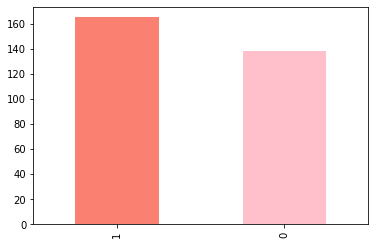

In [5]:
heart_data["output"].value_counts().plot(kind="bar",color=["salmon","pink"]);

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

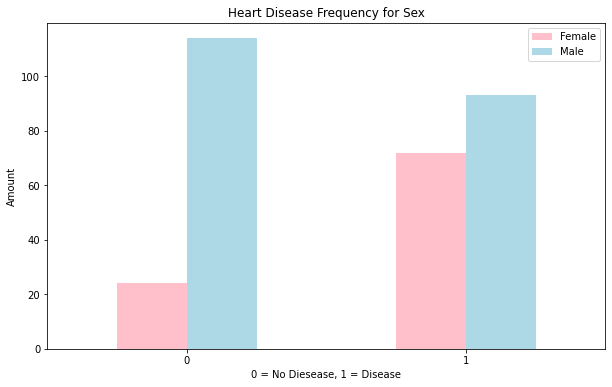

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Create a plot of crosstab
pd.crosstab(heart_data.output, heart_data.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["pink", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

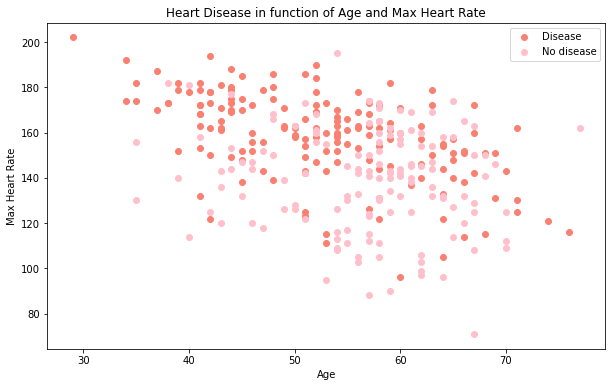

In [9]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(heart_data.age[heart_data.output==1],heart_data.thalachh[heart_data.output==1],c="salmon")
# Scatter with negative examples
plt.scatter(heart_data.age[heart_data.output==0],heart_data.thalachh[heart_data.output==0],c="pink")
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No disease"]);

([<matplotlib.axis.XTick at 0x1d5ebb9be50>,
 [Text(0, 0, 'Typical angina (0)'),
  Text(1, 0, 'Atypical angina (1)'),
  Text(2, 0, 'Non-anginal (2)'),
  Text(3, 0, 'Asymptomatic (3)')])

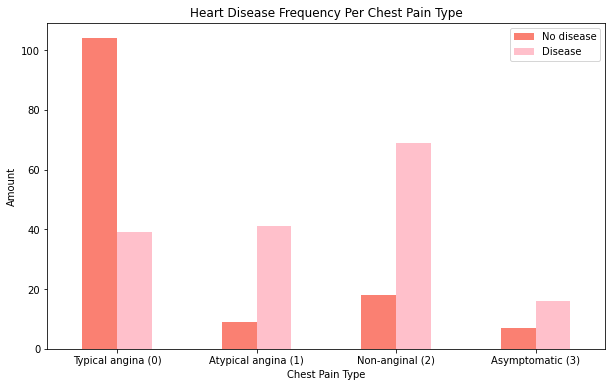

In [10]:
# Make the crosstab more visual
pd.crosstab(heart_data.cp,heart_data.output).plot(kind="bar",figsize=(10,6),color=["salmon","pink"])
# Add some info
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks([0,1,2,3],["Typical angina (0)","Atypical angina (1)","Non-anginal (2)","Asymptomatic (3)"],rotation=0)


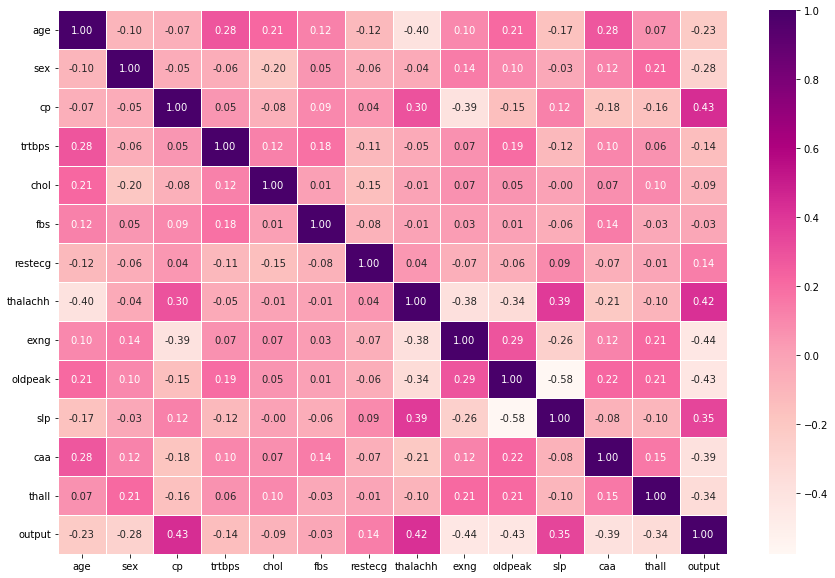

In [30]:
# Make a correlation matrix 
import seaborn as sns
corr_matrix=heart_data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="RdPu")

In [11]:
# Split the data into X and y
X=heart_data.drop("output",axis=1)
y=heart_data["output"]

In [12]:
from sklearn.model_selection import train_test_split
# Split into train & test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluate the model
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Daniela-211021\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

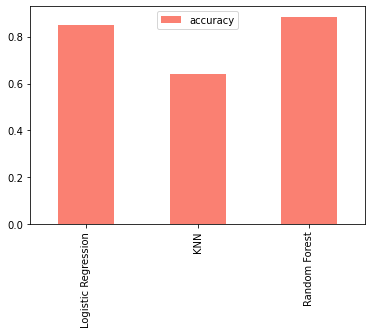

In [42]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color='salmon');

In [49]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(2,21,1),
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features":['auto','log2'],
           "criterion":['gini','entropy']}

In [50]:
# Tune LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True, 
                                random_state=0)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=0, verbose=True)

In [51]:
# Check the best hyperparmaters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.7278953843983146}

In [52]:
# Evaluate the grid search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [53]:
# Tune RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           random_state=0)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=0, verbose=True)

In [54]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 17,
 'criterion': 'entropy'}

In [55]:
rs_rf.score(X_test,y_test)

0.8688524590163934